**Библиотеки Python для DS**

***Урок 6. Определение проблемы переобучения на практике***

Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

Импорт необходимых библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

Загрузка датасета

In [4]:
iris_df = pd.read_csv('sample_data/Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Датасет Ирисы Фишера является классическим набором данных, используемым для задач классификации в машинном обучении. Он содержит информацию о трех видах ирисов и включает четыре измеряемых характеристики.

**Описание столбцов датасета**

- Sepal Length (см): длина чашелистика (наружной доли околоцветника) в сантиметрах
- Sepal Width (см):	ширина чашелистика в сантиметрах
- Petal Length (см): длина лепестка (внутренней доли околоцветника) в сантиметрах
- Petal Width (см):	ширина лепестка в сантиметрах
- Species:	вид ириса, к которому принадлежит образец (Iris setosa, Iris versicolor, Iris virginica)

In [5]:
iris_df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
iris_df.duplicated().sum()

0

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Первичный анализ датасета

In [8]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [9]:
iris_df.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


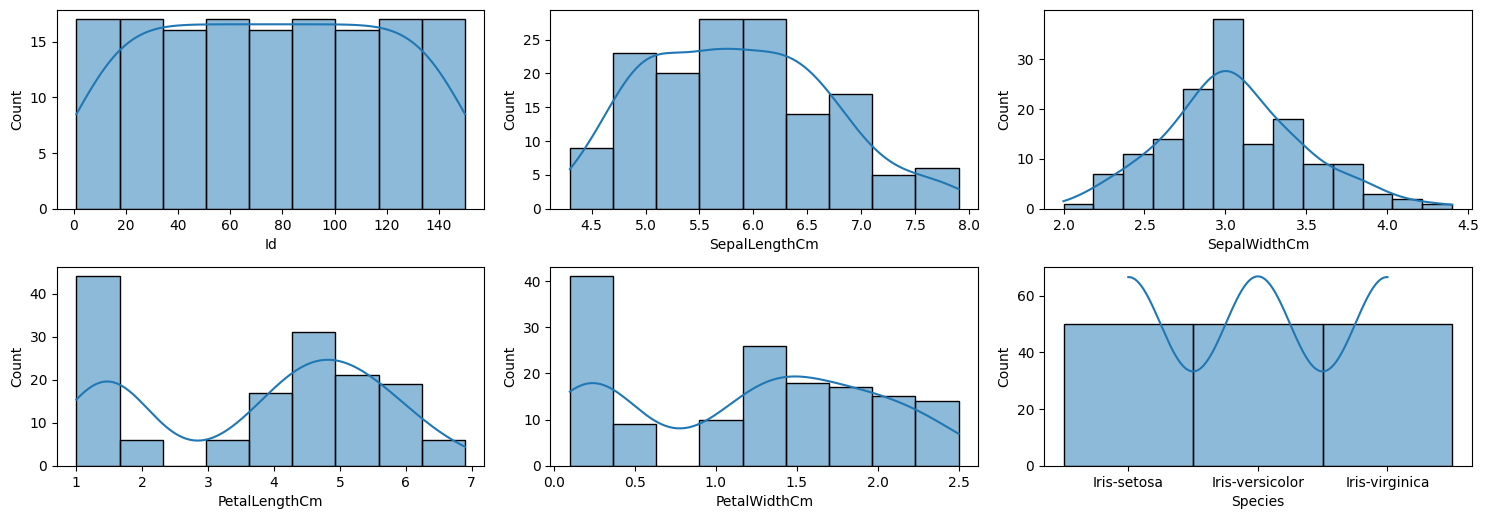

In [10]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(iris_df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(iris_df[column], kde=True)

plt.tight_layout()
plt.show()

In [11]:
df = iris_df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


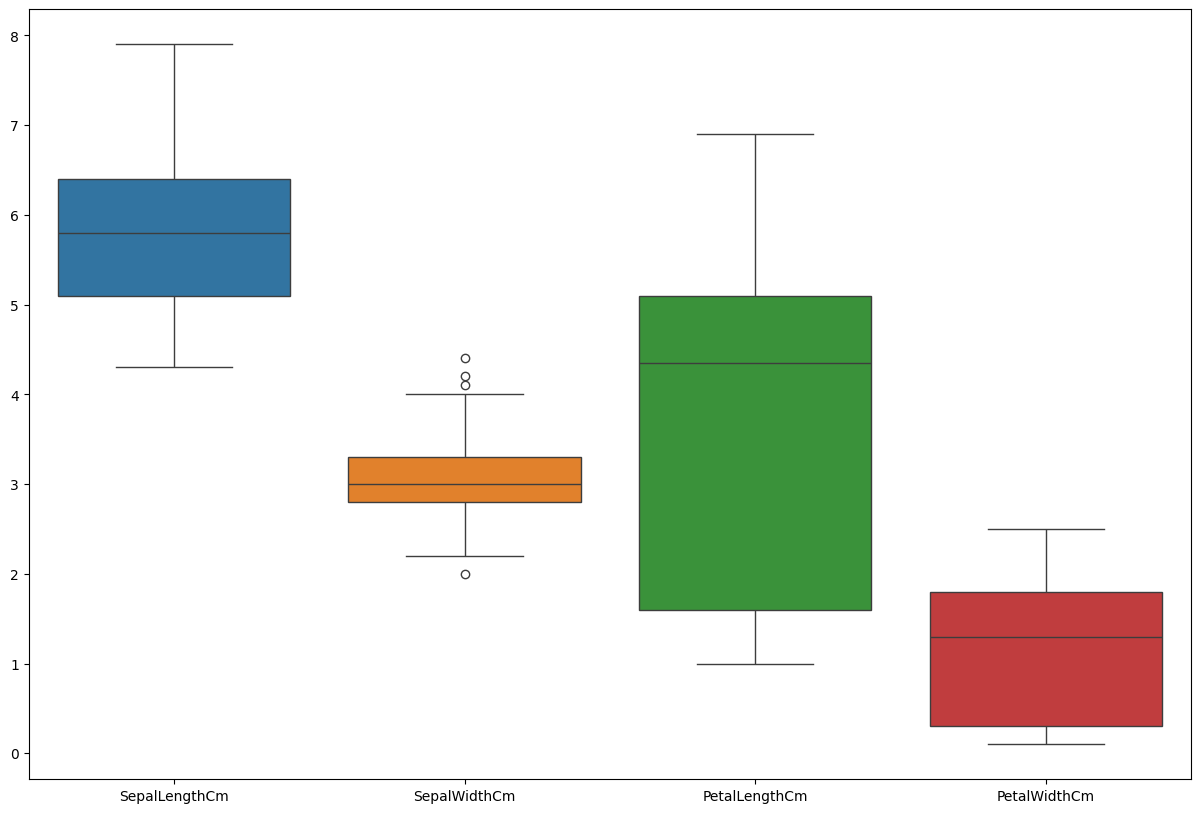

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax=ax)
plt.show()

In [13]:
iris_df.Species.value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [14]:
df['Species'] = df['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

<ipython-input-14-e980799da0b9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})


In [15]:
df.Species.value_counts()

,count
Species,
1,50
2,50
3,50


Обучение модели логистической регрессии без регуляризации

In [28]:
X = df.drop('Species', axis=1)
Y = df['Species']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [29]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [30]:
X = df.drop('Species', axis=1)
Y = df['Species']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)


# Создание и обучение модели логистической регрессии
lg = LogisticRegression(class_weight='balanced', max_iter=200)
lg.fit(X_scaled, Y)


# После обучения модели можно получить коэффициенты\
lg.coef_


array([[-1.07687517,  1.1556016 , -1.92845268, -1.82066355],
       [ 0.58982562, -0.36102976, -0.36550337, -0.82107003],
       [ 0.48704955, -0.79457184,  2.29395605,  2.64173358]])

In [31]:
feature_names = X.columns
coefficients = lg.coef_  # lg.coef_ возвращает массив в массиве, если модель обучена на двухмерном X

# Связывание имен признаков с их коэффициентами
feature_importances = zip(feature_names, coefficients)

# Преобразование в список для более удобного отображения
feature_importance_list = list(feature_importances)

# Отображение признаков и их коэффициентов
for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

SepalLengthCm: [-1.07687517  1.1556016  -1.92845268 -1.82066355]
SepalWidthCm: [ 0.58982562 -0.36102976 -0.36550337 -0.82107003]
PetalLengthCm: [ 0.48704955 -0.79457184  2.29395605  2.64173358]


1. **Коэффициенты для каждого класса:** модель логистической регрессии обучается на три класса (в данном случае три вида ирисов). Каждый класс имеет свой набор коэффициентов, которые показывают, как каждый признак влияет на вероятность принадлежности к этому классу.

2. **Значение коэффициентов:**

- **Положительные коэффициенты:** увеличивают вероятность принадлежности к классу. Если признак увеличивается, то вероятность принадлежности к этому классу также увеличивается.
- **Отрицательные коэффициенты:** уменьшают вероятность принадлежности к классу. Если признак увеличивается, то вероятность принадлежности к этому классу уменьшается.

In [32]:
accuracy_test = accuracy_score(y_test, lg.predict(X_test))
#Y_pred_test_lg = lg.predict(X_test)


accuracy_train = accuracy_score(y_train, lg.predict(X_train))
#Y_pred_train_lg = lg.predict(X_train)

print("Логистическая регрессия:")
print("Тренировочный accuracy:", accuracy_train)
print("Тестовый accuracy:", accuracy_test)

Логистическая регрессия:
Тренировочный accuracy: 0.9666666666666667
Тестовый accuracy: 1.0


**Основные наблюдения**

- Тренировочная точность (Accuracy):
значение 96,67% на тренировочном наборе данных указывает на то, что модель хорошо справляется с задачей классификации на данных, на которых она обучалась. Это высокое значение говорит о том, что модель способна правильно классифицировать большинство примеров.
- Тестовая точность (Accuracy):
значение 100% на тестовом наборе данных означает, что модель правильно классифицировала все примеры в тестовом наборе. Это может быть признаком того, что модель хорошо обобщает данные.

**Возможные причины такого результата**
1. Простота данных: если данные относительно простые или линейно разделимы, модель может легко найти идеальное разделение между классами.
2. Переобучение (Overfitting): хотя высокая точность на тестовом наборе может указывать на хорошую обобщающую способность модели, важно проверить, не произошло ли переобучение.
Переобучение происходит, когда модель слишком хорошо запоминает тренировочные данные и не может обобщать на новые данные. Однако в вашем случае высокая точность на тестовом наборе может указывать на то, что это не так.
3. Неправильное разделение данных: если тестовые данные каким-либо образом "заражены" тренировочными данными (например, если они были случайно перемешаны или неправильно разделены), это может привести к высокой точности.
4. Неравномерное распределение классов: если в задаче классификации всего два класса и данные хорошо разделены, модель может достичь 100% точности. Также это может произойти при сильном дисбалансе классов.


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

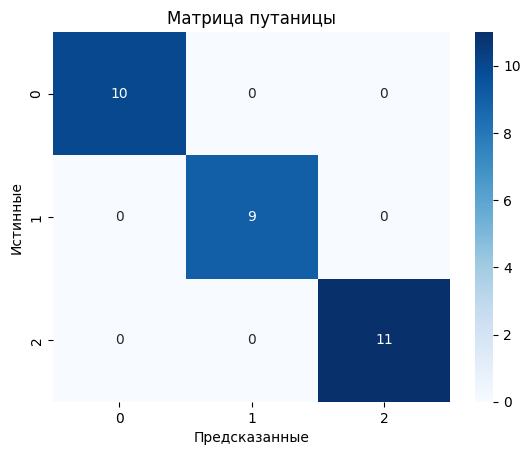

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
# Предположим, y_test — истинные значения классов, а y_pred — предсказанные значения вашей модели
y_pred = lg.predict(X_test)

# Матрица путаницы
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.title('Матрица путаницы')
plt.show()

# Отчет о классификации
print(classification_report(y_test, y_pred))

Матрица путаницы также показала отличные результаты, что в том числе может свидетельствовать о том, что модель склонна к переобучению.

Подбор оптимального значения параметра L1- и L2-регуляризации с помощью кросс-валидации

In [40]:
from pickle import DEFAULT_PROTOCOL

X = df.drop('Species', axis=1)
Y = df['Species']
X_scaled = StandardScaler().fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

# Определение модели логистической регрессии с L1 регуляризацией
model = LogisticRegression(penalty='l1', solver='liblinear')

# Определение диапазона значений параметра регуляризации C для поиска
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Настройка кросс-валидации с GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Обучение модели на обучающих данных с кросс-валидацией
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и соответствующей точности
print("Лучшее значение C для L1 регуляризации:", grid_search.best_params_['C'])
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Оценка модели на тестовом наборе данных с лучшим значением C
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Точность на тестовом наборе:", test_accuracy)

Лучшее значение C для L1 регуляризации: 10
Лучшая точность на кросс-валидации: 0.9583333333333334
Точность на тестовом наборе: 1.0


In [41]:
from pickle import DEFAULT_PROTOCOL

X = df.drop('Species', axis=1)
Y = df['Species']
X_scaled = StandardScaler().fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

# Определение модели логистической регрессии с L1 регуляризацией
model = LogisticRegression(penalty='l2')

# Определение диапазона значений параметра регуляризации C для поиска
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Настройка кросс-валидации с GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Обучение модели на обучающих данных с кросс-валидацией
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и соответствующей точности
print("Лучшее значение C для L2 регуляризации:", grid_search.best_params_['C'])
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Оценка модели на тестовом наборе данных с лучшим значением C
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Точность на тестовом наборе:", test_accuracy)

Лучшее значение C для L2 регуляризации: 1
Лучшая точность на кросс-валидации: 0.9583333333333334
Точность на тестовом наборе: 1.0


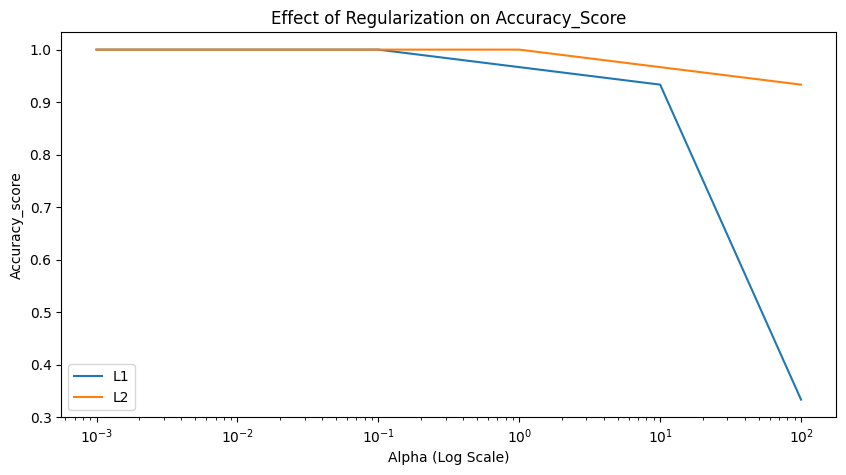

In [43]:
import matplotlib.pyplot as plt

# Переопределим данные для создания графиков
accuracy_score_l1 = []
accuracy_score_l2 = []

# Тестируем Lasso регрессию и Ridge регрессию, сохраняем результаты R^2
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    # Логистическая регрессия с L1 регуляризацией
    logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha)  # 'liblinear' поддерживает L1
    logistic_l1.fit(X_train, y_train)
    y_pred_l1 = logistic_l1.predict(X_test)
    accuracy_score_l1.append(accuracy_score(y_test, y_pred_l1))

for alpha in alphas:
    # Логистическая регрессия с L2 регуляризацией
    logistic_l2 = LogisticRegression(penalty='l2', C=1/alpha)  # По умолчанию 'l2'
    logistic_l2.fit(X_train, y_train)
    y_pred_l2 = logistic_l2.predict(X_test)

    accuracy_score_l2.append(accuracy_score(y_test, y_pred_l2))

# Создаем графики
plt.figure(figsize=(10, 5))
plt.plot(alphas, accuracy_score_l1, label='L1')
plt.plot(alphas, accuracy_score_l2, label='L2')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Accuracy_score')
plt.title('Effect of Regularization on Accuracy_Score')
plt.legend()
plt.show()

Построение графиков кривых обучения для каждой из моделей

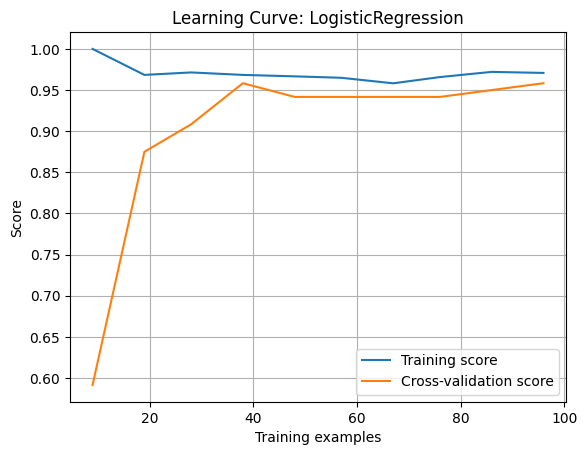

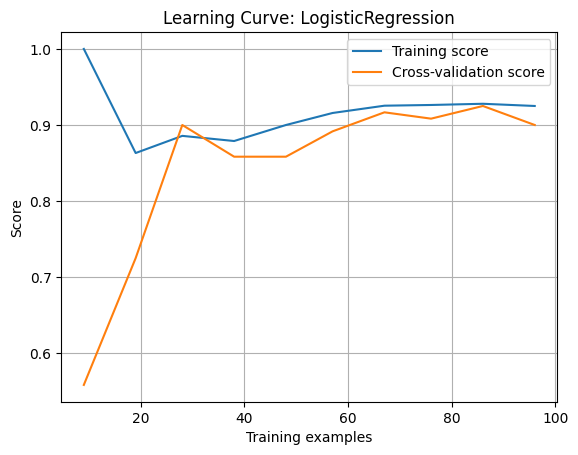

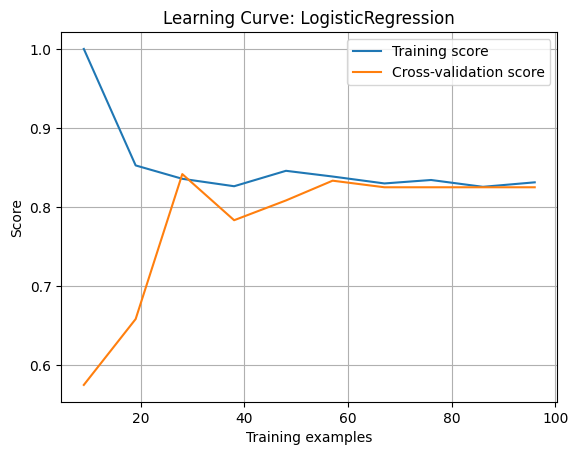

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('Species', axis=1)
Y = df['Species']
X_scaled = StandardScaler().fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

# Определение моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Logistic Regression with L1': LogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=200),
    'Logistic Regression with L2': LogisticRegression(penalty='l2', solver='liblinear', C=1/10, max_iter=200)
}

# Функция для построения кривых обучения
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
    )

    # Средние значения точности для обучающей и тестовой выборок
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Построение графика
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curve: {model.__class__.__name__}')
    plt.legend()
    plt.grid()
    plt.show()

# Построение кривых обучения для каждой модели
for model_name, model in models.items():
    plot_learning_curve(model, X_train, y_train)

**Интерпретация графиков**

- Обучающая кривая: показывает производительность модели на обучающих данных. Если эта кривая высока и стабильно растет с увеличением размера обучающей выборки, это хороший признак, однако в нашем случае только модель на тестовых данных без регуляции показывает более-менее стабильный результат с увеличением количества обучающих данных, модели же с регуляцией показали падение, что может говорить о том, что модели с регуляцией склонны к переобучению. Падение на обучающей кривой может также быть связано с неправильной настройкой гиперпараметров модели, таких как скорость обучения или регуляризация. Если скорость обучения слишком высока, это может привести к нестабильному поведению модели во время обучения.
- Кросс-валидационная кривая: показывает производительность модели на валидационных данных. Если эта кривая значительно ниже обучающей или не растет с увеличением размера выборки, это может указывать на переобучение или недообучение. В нашем случае все модели показали устойчивый рост, несмотря на незначительные снижения точности для моделей с регуляцией для количества тестовых данных между значениями 30 и 40.
- Разница между кривыми: если разница между обучающей и тестовой кривыми велика (например, обучающая кривая высока и тестовая низка), это может свидетельствовать о переобучении. В нашем случае кривые у всех моделей с увеличением количества тестовых данных сближаются.
